In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# For better visuals
sns.set(style="whitegrid")


In [2]:
# Load trained model
model = joblib.load("../models/ids_random_forest.pkl")

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_cicids2017.csv")

# Features and labels
X = df.drop(columns=["Label", "LabelEncoded"])
y = df["LabelEncoded"]

# Scale numeric features
numeric_cols = X.select_dtypes(include=[np.number]).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Data and model ready ✅")


Data and model ready ✅


In [3]:
y_pred = model.predict(X)


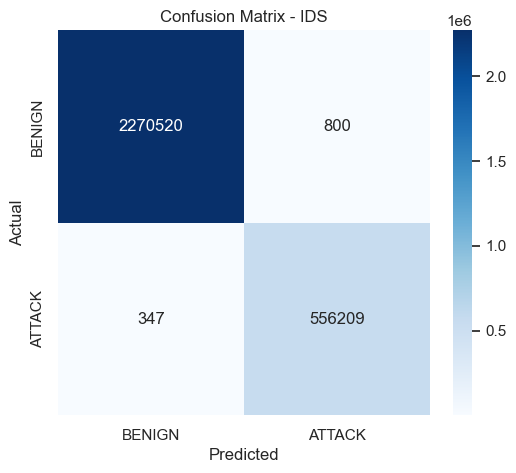

In [4]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["BENIGN","ATTACK"], yticklabels=["BENIGN","ATTACK"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IDS")
plt.show()


In [5]:
cr = classification_report(y, y_pred, target_names=["BENIGN","ATTACK"])
print("Classification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00   2271320
      ATTACK       1.00      1.00      1.00    556556

    accuracy                           1.00   2827876
   macro avg       1.00      1.00      1.00   2827876
weighted avg       1.00      1.00      1.00   2827876

